In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('../notebook/data/EHR.csv')

### Top Five Records

In [96]:
df.head(5)

,Patient_ID,Age,Gender,Tumor_Size(cm),Tumor_Type,Biopsy_Result,Treatment,Response_to_Treatment,Survival_Status
0,c044501a-43ca-4a0c-8b8b-991439ba1b6a,52,Female,5.08,Benign,Positive,Surgery,No Response,Survived
1,b8900c4c-1232-4084-9432-5d02eba74d20,32,Female,0.80,Benign,Negative,Surgery,Complete Response,Survived
2,3004e2bc-8037-49cb-a542-d5612b73beab,70,Female,9.56,Benign,Positive,Radiation Therapy,Complete Response,Deceased
3,1df86af7-6745-4dea-b127-cbc9915079fc,21,Female,3.07,Malignant,Negative,Surgery,Partial Response,Survived
4,128e00c3-72e3-4031-a7f4-1165d7199cce,62,Male,7.17,Malignant,Positive,Radiation Therapy,Complete Response,Deceased


### Shape of Data Frame

In [97]:
df.shape

(20000, 9)

### Dataset information

### Checking for Missing Values

In [98]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Tumor_Size(cm)           0
Tumor_Type               0
Biopsy_Result            0
Treatment                0
Response_to_Treatment    0
Survival_Status          0
dtype: int64

#### No missing value

### Check for Duplicate values

In [99]:
df.duplicated().sum()

np.int64(0)

#### No Duplicate Values

### Check Datatypes

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             20000 non-null  object 
 1   Age                    20000 non-null  int64  
 2   Gender                 20000 non-null  object 
 3   Tumor_Size(cm)         20000 non-null  float64
 4   Tumor_Type             20000 non-null  object 
 5   Biopsy_Result          20000 non-null  object 
 6   Treatment              20000 non-null  object 
 7   Response_to_Treatment  20000 non-null  object 
 8   Survival_Status        20000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


### Checking the number of unique values of each column

In [101]:
df.nunique()

Patient_ID               20000
Age                         61
Gender                       2
Tumor_Size(cm)             951
Tumor_Type                   2
Biopsy_Result                2
Treatment                    3
Response_to_Treatment        3
Survival_Status              2
dtype: int64

### Droping Unnessecary Features

In [102]:
# df = df.drop(columns=["Patient_ID"])

### Check statistics of data set

In [103]:
df.describe()

,Age,Tumor_Size(cm)
count,20000.000000,20000.000000
mean,49.964600,5.247120
std,17.511404,2.736922
min,20.000000,0.500000
25%,35.000000,2.890000
50%,50.000000,5.260000
75%,65.000000,7.592500
max,80.000000,10.000000


## Exploring Data

In [104]:
df.head(5)

,Patient_ID,Age,Gender,Tumor_Size(cm),Tumor_Type,Biopsy_Result,Treatment,Response_to_Treatment,Survival_Status
0,c044501a-43ca-4a0c-8b8b-991439ba1b6a,52,Female,5.08,Benign,Positive,Surgery,No Response,Survived
1,b8900c4c-1232-4084-9432-5d02eba74d20,32,Female,0.80,Benign,Negative,Surgery,Complete Response,Survived
2,3004e2bc-8037-49cb-a542-d5612b73beab,70,Female,9.56,Benign,Positive,Radiation Therapy,Complete Response,Deceased
3,1df86af7-6745-4dea-b127-cbc9915079fc,21,Female,3.07,Malignant,Negative,Surgery,Partial Response,Survived
4,128e00c3-72e3-4031-a7f4-1165d7199cce,62,Male,7.17,Malignant,Positive,Radiation Therapy,Complete Response,Deceased


In [105]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())
print("Categories in 'Tumor_Type' variable:     ",end=" " )
print(df['Tumor_Type'].unique())
print("Categories in 'Biopsy_Result' variable:     ",end=" " )
print(df['Biopsy_Result'].unique())
print("Categories in 'Treatment' variable:     ",end=" " )
print(df['Treatment'].unique())
print("Categories in 'Response_to_Treatment' variable:     ",end=" " )
print(df['Response_to_Treatment'].unique())
print("Categories in 'Survival_Status' variable:     ",end=" " )
print(df['Survival_Status'].unique())

Categories in 'Gender' variable:      ['Female' 'Male']
Categories in 'Tumor_Type' variable:      ['Benign' 'Malignant']
Categories in 'Biopsy_Result' variable:      ['Positive' 'Negative']
Categories in 'Treatment' variable:      ['Surgery' 'Radiation Therapy' 'Chemotherapy']
Categories in 'Response_to_Treatment' variable:      ['No Response' 'Complete Response' 'Partial Response']
Categories in 'Survival_Status' variable:      ['Survived' 'Deceased']


In [106]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Age', 'Tumor_Size(cm)']

We have 7 categorical features : ['Patient_ID', 'Gender', 'Tumor_Type', 'Biopsy_Result', 'Treatment', 'Response_to_Treatment', 'Survival_Status']


In [107]:
age_bt_20_40 = df[df['Age'] <= 40]['Age'].count()
age_bt_41_60 = df[(df['Age'] > 40) & (df["Age"]<=60)]['Age'].count()
age_bt_61_80 = df[(df['Age'] >60) & (df["Age"]<=80)]['Age'].count()
print(f'Number of patients in age group 20 to 40: {age_bt_20_40}')
print(f'Number of patients in age group 41 to 60: {age_bt_41_60}')
print(f'Number of patients in age group 61 to 80: {age_bt_61_80}')

Number of patients in age group 20 to 40: 6859
Number of patients in age group 41 to 60: 6632
Number of patients in age group 61 to 80: 6509


Number of patients in age group 20 to 40: 6859

Number of patients in age group 41 to 60: 6632

Number of patients in age group 61 to 80: 6509


## Queries
    1. Relationship of Survival with Gender
    2. Relationship of Survival with Type of Tumour
    3. Relationship of Survival with Type of Treatment
    4. Relationship of Survival with Biopsy Result
    5. Relationship of Survival with Response To Treatment

In [108]:
survivied_patients = df[df["Survival_Status"] == "Survived"]

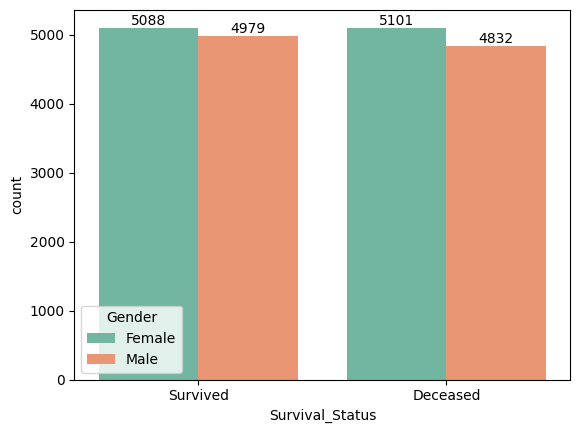

In [153]:
ax = sns.countplot(data=df, x='Survival_Status', hue='Gender', palette='Set2')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);


In [ ]:
sns.stripplot(data=df,x="Tumor_Size(cm)",y="Survival_Status",hue="Gender",)

### Insight
    Almost same number of Male and Female patients have survived 

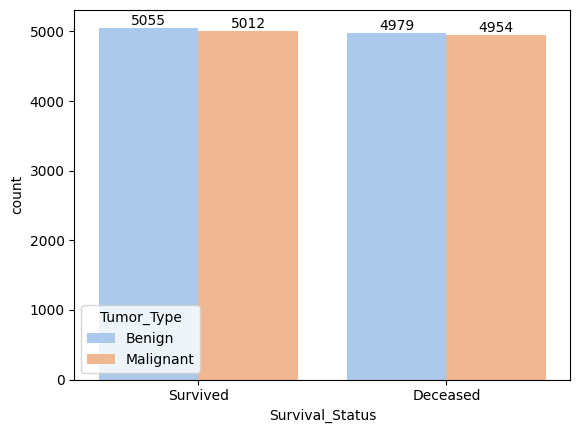

In [152]:
ax = sns.countplot(data=df, x='Survival_Status', hue='Tumor_Type', palette='pastel')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

### Insight
    Both Type of Tumour Has Almost Same Effect in survival

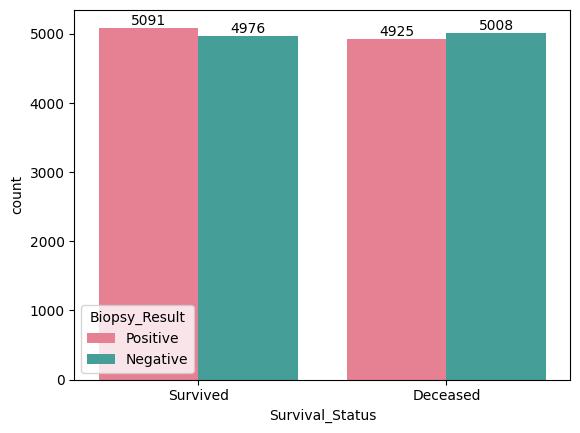

In [151]:
ax = sns.countplot(data=df, x='Survival_Status', hue='Biopsy_Result', palette='husl')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);


### Insight
    Biopsy Result has not been much effective in survival

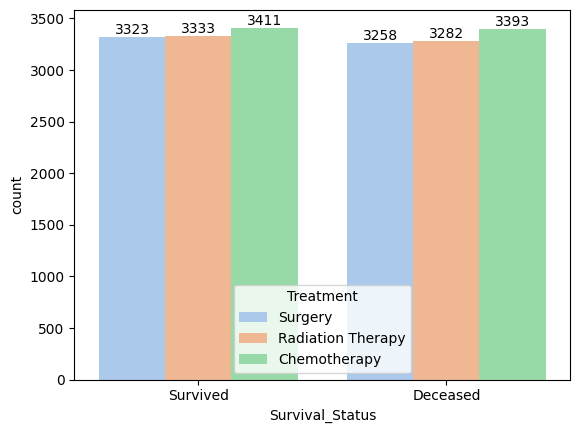

In [150]:
ax = sns.countplot(data=df, x='Survival_Status', hue='Treatment', palette='pastel')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);


### Insight
    Almost All Modes of Treatment seems to be equally effective

In [113]:
df["Response_to_Treatment"].unique()

array(['No Response', 'Complete Response', 'Partial Response'],
      dtype=object)

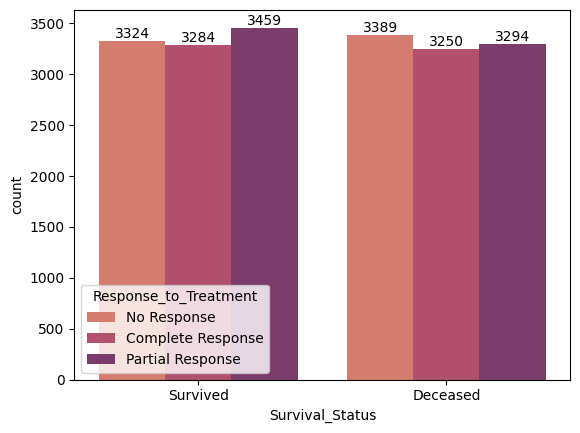

In [156]:
ax = sns.countplot(data=df, x='Survival_Status', hue='Response_to_Treatment', palette='flare')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);

### Insight
    Patients With Patial Response have survived more than those who showed Complete Response to treatment

In [22]:
df1 = pd.read_csv('../notebook/data/EHR.csv')

In [23]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Size(cm)', 'Tumor_Type',
       'Biopsy_Result', 'Treatment', 'Response_to_Treatment',
       'Survival_Status'],
      dtype='object')

In [27]:
df.index

RangeIndex(start=0, stop=20000, step=1)

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x = "Tumor_Size(cm)",y=df.index,hue="Survival_Status")
